In [1]:
import pandas as pd
import researchpy as rp
import statsmodels.stats.weightstats
from statsmodels.stats.anova import AnovaRM
import pingouin as pg
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [6]:
def read_response(pid):
    answers = pd.read_excel('../data/shadow_materials_with_answers.xlsx', sheet_name='pid%s' % pid, header=None)
    # select first 9 cols
    answers = answers.loc[:, :9]
    # select A-X set
    answers = answers.iloc[1:25]

    answers.columns = ['?', 'group', 'stim1', 'stim2', 'cl1', 'cl2', 'cl3', 'cl4', 'scoreA', 'scoreB']
    answers.drop(['stim1', 'stim2', 'cl1', 'cl2', 'cl3', 'cl4', 'scoreB'], axis=1, inplace=True)
    answers['?'] = pd.to_numeric(answers['?']).astype('int')
    answers.set_index('?', drop=True, inplace=True)
    #answers.columns = [f'group.{pid}',f'score.{pid}']
    return answers

In [7]:
ans100 = read_response(100)
ans101 = read_response(101)
ans102 = read_response(102)
ans103 = read_response(103)
ans104 = read_response(104)
ans105 = read_response(105)
ans106 = read_response(106)

In [55]:
answers = pd.concat([ans100, ans101, ans102, ans103, ans104, ans105, ans106], axis=1)
#answers.drop(['group.101','group.102','group.103','group.104','group.105','group.106'], axis=1, inplace=True)

In [73]:
answers.columns = ['group', '100', '101', '102', '103', '104', '105', '106']

In [106]:
answers = pd.concat([ans100, ans101, ans103, ans104, ans106], ignore_index=True)
answers['group'] = pd.to_numeric(answers['group'])
answers['scoreA']  = pd.to_numeric(answers['scoreA'])
answers = answers[answers.group != 4]

In [108]:
print(rp.summary_cont(answers['scoreA'].groupby(answers['group'])))



        N    Mean      SD      SE  95% Conf.  Interval
group                                                 
1      30  0.6667  0.4795  0.0875     0.4876    0.8457
2      30  0.6333  0.4901  0.0895     0.4503    0.8164
3      30  0.5333  0.5074  0.0926     0.3439    0.7228


In [109]:
print(rp.summary_cont(answers['scoreA']))



  Variable     N    Mean      SD      SE  95% Conf.  Interval
0   scoreA  90.0  0.6111  0.4902  0.0517     0.5084    0.7138


## Normality Test: Shapiro-Wilk Test

In [2]:
def read_recall_table(cue_type):
    answers = pd.read_excel('../data/shadow_materials_with_answers.xlsx', sheet_name='%recall', header=0)
    if cue_type=='tnt':
        answers = answers.iloc[22:50]
    elif cue_type=='ax':
        answers = answers.iloc[0:21]
    elif cue_type=='bx':
        answers = answers.iloc[51:75]
    answers = answers[['pid','group_num','group_name','%recall']]
    answers['pid'] = pd.to_numeric(answers['pid']).astype(int)
    answers['group_num'] = pd.to_numeric(answers['group_num']).astype(int)
    answers['%recall'] = pd.to_numeric(answers['%recall']).astype(float)
    return answers

In [3]:
answersTNT = read_recall_table('tnt')

In [4]:
# Test if the data distributes in Gaussian
W, p = stats.shapiro(answersTNT['%recall'])
print(f"Overall normality,\tW:{W:.4f}\tp: {p}")
for i in range(1, 5):
    W, p = stats.shapiro((answersTNT['%recall'].loc[answersTNT['group_num']==i]))
    print(f"Nomality group {i}:\tW: {W:.4f}\tp: {p}")

'''for i in range(100, 107):
    W, p = stats.shapiro((answersTNT['%recall'].loc[answersTNT['pid']==i]))
    print(f"Nomality group {i}:\tW: {W:.4f}\tp: {p}")'''

Overall normality,	W:0.7645	p: 2.6810443159774877e-05
Nomality group 1:	W: 0.8267	p: 0.07445400953292847
Nomality group 2:	W: 0.7597	p: 0.016010090708732605
Nomality group 3:	W: 0.7538	p: 0.013886251486837864
Nomality group 4:	W: 0.8052	p: 0.04605488106608391


'for i in range(100, 107):\n    W, p = stats.shapiro((answersTNT[\'%recall\'].loc[answersTNT[\'pid\']==i]))\n    print(f"Nomality group {i}:\tW: {W:.4f}\tp: {p}")'

<Axes: xlabel='%recall', ylabel='Count'>

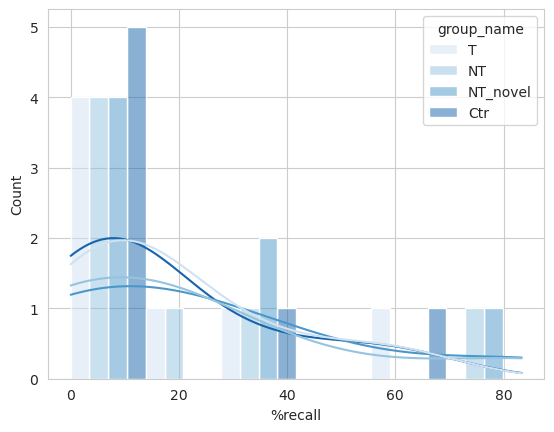

In [5]:
sns.histplot(answersTNT, x='%recall', hue='group_name', kde=True, palette='Blues', multiple='dodge')

## One-way ANOVA

### TNT

In [6]:
pg.anova(answersTNT, dv='%recall', between='group_name', detailed=True)

Source            SS  DF          MS         F     p-unc       np2
0  group_name    146.329365   3   48.776455  0.074968  0.972873  0.009284
1      Within  15615.079365  24  650.628307       NaN       NaN       NaN

In [7]:
from  scipy.stats import f_oneway, kruskal

In [8]:
f_oneway(answersTNT.loc[answersTNT['group_num']==1]['%recall'],
               answersTNT.loc[answersTNT['group_num']==2]['%recall'],
               answersTNT.loc[answersTNT['group_num']==3]['%recall'],
               answersTNT.loc[answersTNT['group_num']==4]['%recall'])

F_onewayResult(statistic=0.07496823379923763, pvalue=0.9728728591185487)

In [9]:
kruskal(answersTNT.loc[answersTNT['group_num']==1]['%recall'],
               answersTNT.loc[answersTNT['group_num']==2]['%recall'],
               answersTNT.loc[answersTNT['group_num']==3]['%recall'],
               answersTNT.loc[answersTNT['group_num']==4]['%recall'])

KruskalResult(statistic=0.06740859851048633, pvalue=0.99543830619803)

### Trained Cue

In [10]:
answersTrained = read_recall_table('ax')
pg.anova(answersTrained, dv='%recall', between='group_name', detailed=True)

Source            SS  DF           MS         F     p-unc       np2
0  group_name    820.105820   2   410.052910  0.360465  0.702273  0.038509
1      Within  20476.190476  18  1137.566138       NaN       NaN       NaN

In [14]:
# Test if the data distributes in Gaussian
W, p = stats.shapiro(answersTrained['%recall'])
print(f"Overall normality,\tW:{W:.4f}\tp: {p}")
for i in range(1, 4):
	W, p = stats.shapiro((answersTrained['%recall'].loc[answersTrained['group_num']==i]))
	print(f"Nomality group {i}:\tW: {W:.4f}\tp: {p}")

Overall normality,	W:0.8995	p: 0.0341481976211071
Nomality group 1:	W: 0.8906	p: 0.2777581214904785
Nomality group 2:	W: 0.9490	p: 0.7201515436172485
Nomality group 3:	W: 0.8404	p: 0.10031339526176453


In [11]:
W, p = stats.shapiro(answersTrained['%recall'])
print(f"Overall normality,\tW:{W:.4f}\tp: {p}")
for i in range(1, 4):
    W, p = stats.shapiro((answersTrained['%recall'].loc[answersTrained['group_num']==i]))
    print(f"Nomality group {i}:\tW: {W:.4f}\tp: {p}")

Overall normality,	W:0.8995	p: 0.0341481976211071
Nomality group 1:	W: 0.8906	p: 0.2777581214904785
Nomality group 2:	W: 0.9490	p: 0.7201515436172485
Nomality group 3:	W: 0.8404	p: 0.10031339526176453


In [12]:
kruskal(answersTrained.loc[answersTrained['group_num']==1]['%recall'],
        answersTrained.loc[answersTrained['group_num']==2]['%recall'],
        answersTrained.loc[answersTrained['group_num']==3]['%recall'])

KruskalResult(statistic=0.843408453428767, pvalue=0.6559280166900008)

### Independent Cue

In [64]:
answersIdp = read_recall_table('bx')
pg.anova(answersIdp, dv='%recall', between='group_name', detailed=True)

Source           SS  DF          MS         F     p-unc       np2
0  group_name    19.841270   2    9.920635  0.018595  0.981596  0.002062
1      Within  9603.174603  18  533.509700       NaN       NaN       NaN

In [72]:
W, p = stats.shapiro(answersIdp['%recall'])
print(f"Overall normality,\tW:{W:.4f}\tp: {p}")
for i in range(1, 4):
    W, p = stats.shapiro((answersIdp['%recall'].loc[answersIdp['group_num']==i]))
    print(f"Nomality group {i}:\tW: {W:.4f}\tp: {p}")

Overall normality,	W:0.8930	p: 0.02563161589205265
Nomality group 1:	W: 0.9003	p: 0.333102285861969
Nomality group 2:	W: 0.9306	p: 0.5560402870178223
Nomality group 3:	W: 0.8874	p: 0.26160433888435364


In [65]:
kruskal(answersIdp.loc[answersIdp['group_num']==1]['%recall'],
        answersIdp.loc[answersIdp['group_num']==2]['%recall'],
        answersIdp.loc[answersIdp['group_num']==3]['%recall'])

KruskalResult(statistic=0.1468173476287217, pvalue=0.929221004126489)

## Post hoc test

In [8]:
import statsmodels.stats.multicomp as mc
import scipy.stats as stats

In [10]:
comp = mc.MultiComparison(answersTNT['%recall'], answersTNT['group_name'])
tbl, _, _ = comp.allpairtest(stats.ttest_ind, method='bonf')

In [12]:
print(tbl)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
 group1   group2    stat   pval  pval_corr reject
-------------------------------------------------
     Ctr       NT -0.2618 0.7979       1.0  False
     Ctr NT_novel -0.4341 0.6719       1.0  False
     Ctr        T -0.1089 0.9151       1.0  False
      NT NT_novel -0.1499 0.8833       1.0  False
      NT        T  0.1756 0.8635       1.0  False
NT_novel        T  0.3495 0.7328       1.0  False
-------------------------------------------------


In [13]:
comp = mc.MultiComparison(answersTrained['%recall'], answersTrained['group_name'])
tbl, _, _ = comp.allpairtest(stats.ttest_ind, method='bonf')
print(tbl)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
   Ctr     NT -0.6202 0.5467       1.0  False
   Ctr      T -0.8294 0.4231       1.0  False
    NT      T -0.1353 0.8947       1.0  False
---------------------------------------------


In [14]:
comp = mc.MultiComparison(answersIdp['%recall'], answersIdp['group_name'])
tbl, _, _ = comp.allpairtest(stats.ttest_ind, method='bonf')
print(tbl)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
   Ctr     NT -0.1033 0.9194       1.0  False
   Ctr      T  0.0982 0.9234       1.0  False
    NT      T  0.1786 0.8612       1.0  False
---------------------------------------------


## Repeated Measured ANOVA: TNT

In [5]:
pg.rm_anova(answersTNT, dv='%recall', within='group_name', subject='pid', detailed=True)

Source           SS  DF         MS         F     p-unc       ng2  \
0  group_name   146.329365   3  48.776455  0.783186  0.518735  0.009284   
1       Error  1121.031746  18  62.279541       NaN       NaN       NaN   

        eps  
0  0.566077  
1       NaN

In [13]:
rp.summary_cont(answersTNT['%recall'].groupby(answersTNT['group_name']))

N     Mean       SD       SE  95% Conf.  Interval
group_name                                                   
Ctr         7  17.8571  20.6540   7.8065    -1.2446   36.9589
NT          7  21.4286  29.6027  11.1888    -5.9494   48.8065
NT_novel    7  23.8095  29.8253  11.2729    -3.7743   51.3934
T           7  19.0476  20.2498   7.6537     0.3197   37.7755

## Repeated Measured ANOVA: Trained Cue

In [14]:
answerTrained = pd.read_excel('../data/shadow_materials_with_answers.xlsx', sheet_name='%recall', header=0)
answerTrained = answerTrained.iloc[0:21]
answerTrained = answerTrained[['pid','group_num','group_name','%recall']]
answerTrained['pid'] = pd.to_numeric(answerTrained['pid']).astype(int)
answerTrained['group_num'] = pd.to_numeric(answerTrained['group_num']).astype(int)
answerTrained['%recall'] = pd.to_numeric(answerTrained['%recall']).astype(float)
#answerTNT

In [15]:
pg.rm_anova(answerTrained, dv='%recall', within='group_name', subject='pid', detailed=True)

Source           SS  DF          MS         F     p-unc       ng2  \
0  group_name   820.105820   2  410.052910  1.706422  0.222736  0.038509   
1       Error  2883.597884  12  240.299824       NaN       NaN       NaN   

        eps  
0  0.800768  
1       NaN

## Repeated Measured ANOVA: Independent Cue

In [37]:
answersInd = read_recall_table('bx')

In [38]:
pg.rm_anova(answersInd, dv='%recall', within='group_name', subject='pid', detailed=True)

Source           SS  DF          MS         F     p-unc       ng2  \
0  group_name    19.841270   2    9.920635  0.045455  0.955727  0.002062   
1       Error  2619.047619  12  218.253968       NaN       NaN       NaN   

        eps  
0  0.807215  
1       NaN

## 2-way repeated ANOVA: Independent cue vs Trained Cue

In [25]:
answerTNT = pd.read_excel('../data/shadow_materials_with_answers.xlsx', sheet_name='%recall', header=0)
answerTNT = answerTNT.iloc[np.r_[0:21, 44:65]]
answerTNT['pid'] = pd.to_numeric(answerTNT['pid']).astype(int)
answerTNT['group_num'] = pd.to_numeric(answerTNT['group_num']).astype(int)
answerTNT['%recall'] = pd.to_numeric(answerTNT['%recall']).astype(float)
answerTNT['pid'].iloc[21:]=answerTNT['pid'].iloc[21:]+100
answerTNT

pid  group_num group_name     %recall     Cue_type
0   100          1          T   66.666667      Trained
1   100          2         NT   66.666667      Trained
2   100          3        Ctr   16.666667      Trained
3   101          1          T   66.666667      Trained
4   101          2         NT   83.333333      Trained
5   101          3        Ctr   66.666667      Trained
6   103          1          T   83.333333      Trained
7   103          2         NT  100.000000      Trained
8   103          3        Ctr   83.333333      Trained
9   104          1          T   33.333333      Trained
10  104          2         NT   33.333333      Trained
11  104          3        Ctr    0.000000      Trained
12  106          1          T   66.666667      Trained
13  106          2         NT   33.333333      Trained
14  106          3        Ctr   66.666667      Trained
15  102          1          T    0.000000      Trained
16  102          2         NT    0.000000      Trained
17  102          3        Ctr    0.000000      Trained
18  105          1          T   33.333333      Trained
19  105          2         NT   16.666667      Trained
20  105          3        Ctr   16.666667      Trained
44  100          1          T   66.666667  Independent
45  100          2         NT   50.000000  Independent
46  100          3        Ctr   16.666667  Independent
47  101          1          T    0.000000  Independent
48  101          2         NT   16.666667  Independent
49  101          3        Ctr   16.666667  Independent
50  103          1          T   50.000000  Independent
51  103          2         NT   66.666667  Independent
52  103          3        Ctr   50.000000  Independent
53  104          1          T   33.333333  Independent
54  104          2         NT   33.333333  Independent
55  104          3        Ctr   50.000000  Independent
56  106          1          T    8.333333  Independent
57  106          2         NT    8.333333  Independent
58  106          3        Ctr   16.666667  Independent
59  102          1          T   16.666667  Independent
60  102          2         NT    0.000000  Independent
61  102          3        Ctr   33.333333  Independent
62  105          1          T    0.000000  Independent
63  105          2         NT   16.666667  Independent
64  105          3        Ctr    0.000000  Independent

In [36]:
aov = pg.mixed_anova(answerTNT, '%recall', between='Cue_type', within='group_name', subject='pid')
pg.print_table(aov)


ANOVA SUMMARY

Source             SS    DF1    DF2        MS      F    p-unc    np2      eps
-----------  --------  -----  -----  --------  -----  -------  -----  -------
Cue_type     3498.677      1     12  3498.677  1.708    0.216  0.125  nan
group_name    400.132      2     24   200.066  0.873    0.431  0.068    0.830
Interaction   439.815      2     24   219.907  0.959    0.397  0.074  nan
